In [1]:
import pandas as pd
import numpy as np


In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_pd = pd.read_csv('./train/train.csv')

In [4]:
fulcenter_info_pd = pd.read_csv('./train/fulfilment_center_info.csv')
meal_info_pd = pd.read_csv('./train/meal_info.csv')

In [5]:
fulcenter_info_pd.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
meal_info_pd.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
train_pd.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
train_meal_merge_pd = pd.merge(train_pd,meal_info_pd, on ='meal_id' )

In [9]:
train_meal_merge_pd.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai


In [10]:
train_full_merge_pd = pd.merge(train_meal_merge_pd,fulcenter_info_pd, on = 'center_id')

In [11]:
train_full_merge_pd.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [12]:
train_full_merge_pd['homepage_featured'].value_counts()

0    406693
1     49855
Name: homepage_featured, dtype: int64

In [13]:
train_full_merge_pd['emailer_for_promotion'].value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

In [14]:
cate_features = ['category','cuisine','center_type']

## Handling the Categorical Features:
### Get Dummies


In [16]:
train_full_merge_dummies = pd.get_dummies(train_full_merge_pd)
train_full_merge_dummies.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area', 'category_Beverages', 'category_Biryani',
       'category_Desert', 'category_Extras', 'category_Fish',
       'category_Other Snacks', 'category_Pasta', 'category_Pizza',
       'category_Rice Bowl', 'category_Salad', 'category_Sandwich',
       'category_Seafood', 'category_Soup', 'category_Starters',
       'cuisine_Continental', 'cuisine_Indian', 'cuisine_Italian',
       'cuisine_Thai', 'center_type_TYPE_A', 'center_type_TYPE_B',
       'center_type_TYPE_C'],
      dtype='object')

In [17]:
train_full_merge_dummies.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,1,0,0,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,0,0,0,0,0,0,1,0,0,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,0,0,0,0,0,0,1,0,0,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,0,0,0,0,0,0,1,0,0,1
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,0,0,0,0,0,0,1,0,0,1


### EDA

In [17]:
center_type = train_full_merge_pd.groupby('center_type')['num_orders'].sum()

In [18]:
center_type_pd = center_type.to_frame()


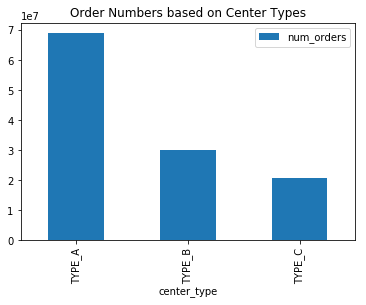

In [19]:
center_type_pd.plot(kind = 'bar',title ='Order Numbers based on Center Types')

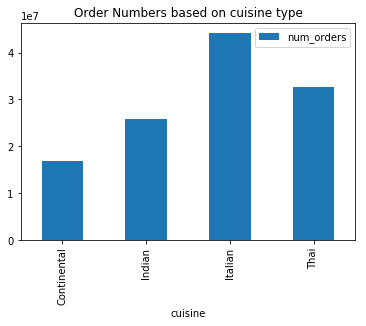

In [20]:
cuisine_type = train_full_merge_pd.groupby('cuisine')['num_orders'].sum()
cuisine_type.to_frame().plot(kind = 'bar',title ='Order Numbers based on cuisine type')

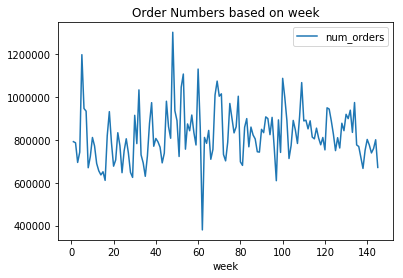

In [21]:
week_group = train_full_merge_pd.groupby('week')['num_orders'].sum()
week_group.to_frame().plot(kind = 'line',title ='Order Numbers based on week')

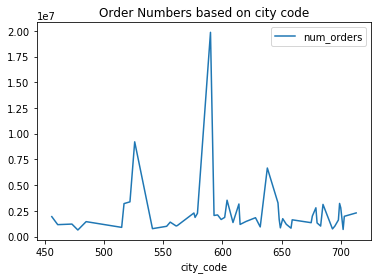

In [22]:
city_code = train_full_merge_pd.groupby('city_code')['num_orders'].sum()
city_code.to_frame().plot(kind = 'line',title ='Order Numbers based on city code')

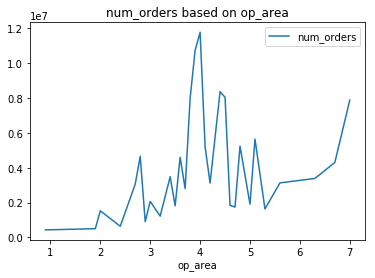

In [23]:
op_area_num = train_full_merge_pd.groupby('op_area')['num_orders'].sum()
op_area_num.to_frame().plot(kind = 'line',title ='num_orders based on op_area')

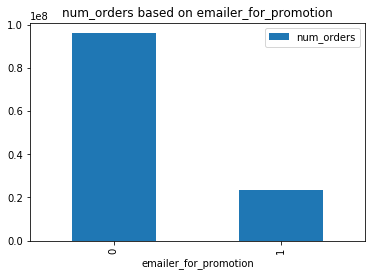

In [24]:
email_prom_num = train_full_merge_pd.groupby('emailer_for_promotion')['num_orders'].sum()
email_prom_num.to_frame().plot(kind = 'bar',title ='num_orders based on emailer_for_promotion')

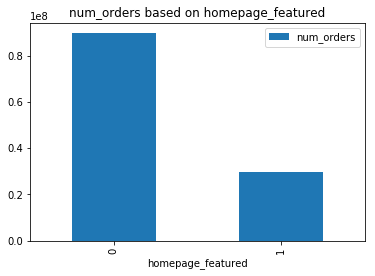

In [25]:
homepage_featured_num = train_full_merge_pd.groupby('homepage_featured')['num_orders'].sum()
homepage_featured_num.to_frame().plot(kind = 'bar',title ='num_orders based on homepage_featured')

In [26]:
data = train_full_merge_pd[['num_orders','op_area','checkout_price','base_price']]

In [27]:
trans_data = np.log(data).diff().dropna()

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


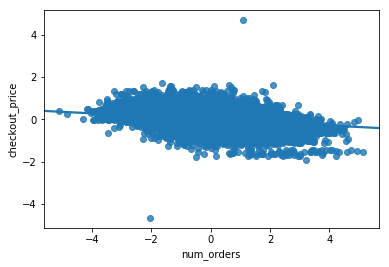

In [28]:
sns.regplot('num_orders', 'checkout_price', data=trans_data)

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


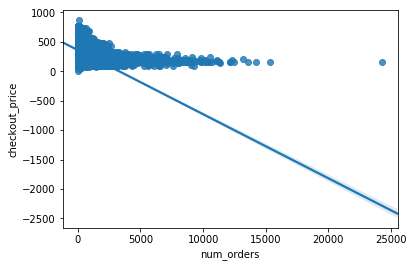

In [29]:
sns.regplot('num_orders', 'checkout_price', data=data)

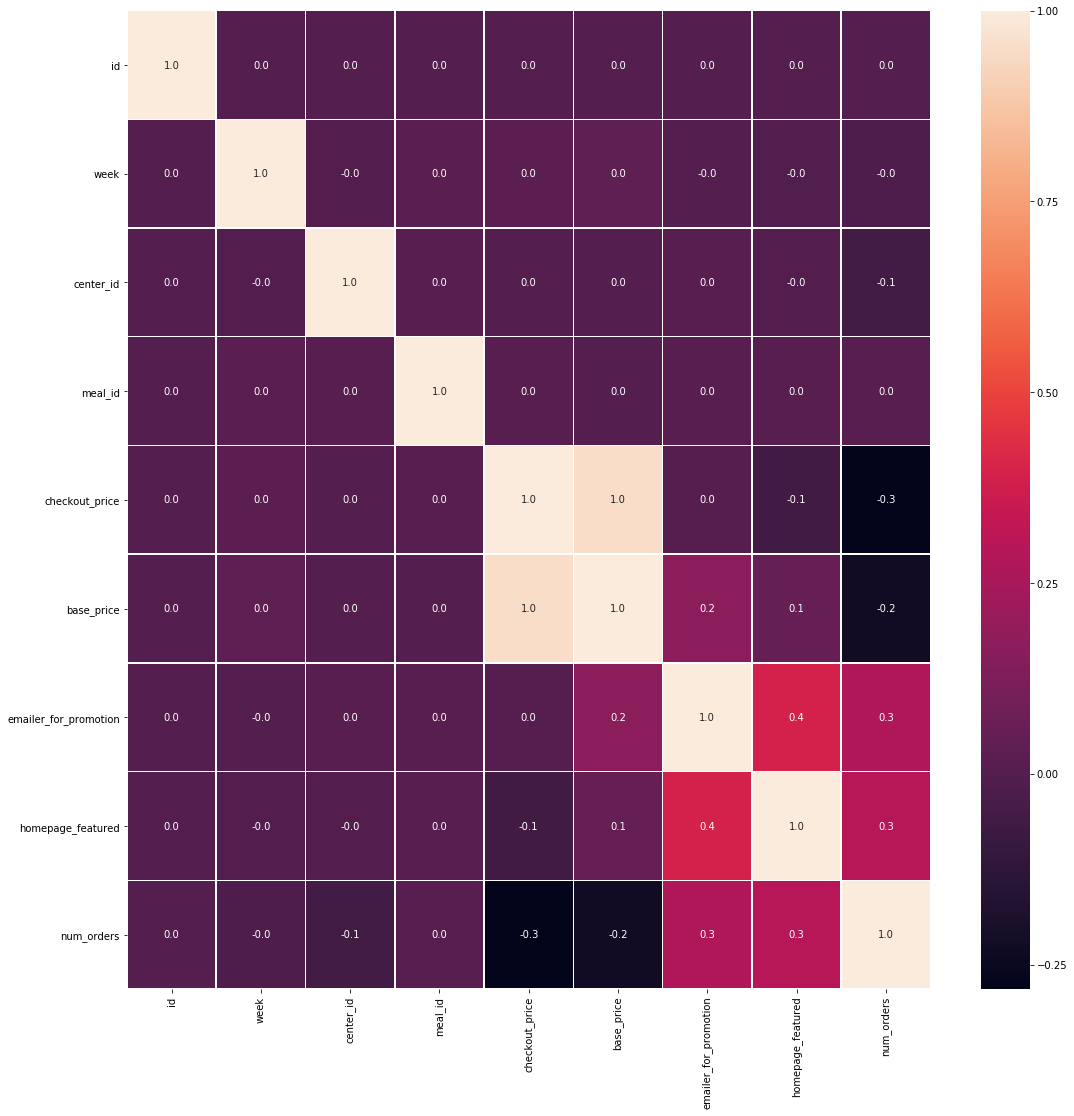

In [30]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_pd.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Model

In [12]:

from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression 
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import brier_score_loss, precision_score, recall_score,f1_score, roc_auc_score, accuracy_score 
from sklearn.metrics import confusion_matrix, roc_curve,auc
#from sklearn.cross_validation import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans

from sklearn.feature_selection import RFE

import random

from scipy.stats import ttest_ind
import scipy

In [13]:
train_full_merge_dummies.columns

NameError: name 'train_full_merge_dummies' is not defined

In [14]:
numberic_features = ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'op_area', 'category_Beverages', 'category_Biryani',
       'category_Desert', 'category_Extras', 'category_Fish',
       'category_Other Snacks', 'category_Pasta', 'category_Pizza',
       'category_Rice Bowl', 'category_Salad', 'category_Sandwich',
       'category_Seafood', 'category_Soup', 'category_Starters',
       'cuisine_Continental', 'cuisine_Indian', 'cuisine_Italian',
       'cuisine_Thai', 'center_type_TYPE_A', 'center_type_TYPE_B',
       'center_type_TYPE_C']

target = ['num_orders']
all_set = numberic_features + target
all_set

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'op_area',
 'category_Beverages',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Continental',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_A',
 'center_type_TYPE_B',
 'center_type_TYPE_C',
 'num_orders']

In [18]:
num_feature_df = train_full_merge_dummies[all_set]

num_feature_df = train_full_merge_dummies.dropna()

In [35]:
#For simple log reg

simple_logit_df = num_feature_df

simple_logit_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,1,0,0,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,0,0,0,0,0,0,1,0,0,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,0,0,0,0,0,0,1,0,0,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,0,0,0,0,0,0,1,0,0,1
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
# Training Set

X = simple_logit_df.drop(columns=['num_orders']).values
y = simple_logit_df['num_orders'].values

#Scaled X
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

estimator = LogisticRegression(solver='sag',max_iter=20000) 
selector = RFE(estimator, 10, step=1)
selector.fit(X_scaled,y)
selector.ranking_

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
#set features
X = simple_logit_df.drop(columns=['num_orders']).values
#set label
y = simple_logit_df['num_orders'].values

estimator = LogisticRegression(solver='sag',max_iter=20000) 
estimator.fit(X_scaled,y)
coeffs=estimator.coef_[0]

In [ ]:
coeffs_list=(selector.estimator_.coef_[0])
print ('coefficients',selector.estimator_.coef_)

In [ ]:
features = simple_logit_df.drop(columns=['nominated']).columns.tolist()
feature_ranking = list(selector.ranking_)
ranking_df = zip(feature_ranking,features)
parameters=[]
for rank,parameter in ranking_df:
    if rank == 1:
        parameters.append(parameter)

        

Features_co_list=pd.DataFrame({"Feature": parameters,
                    "Coefficient": coeffs_list})
Features_co_list.sort_values('Coefficient', ascending=False)

# GBoosting

In [21]:
from numpy import loadtxt
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# load data
XGB_df = num_feature_df

# split data into X and y
Xg = XGB_df.drop(columns=['num_orders'])
Yg = XGB_df['num_orders']
# split data into train and test sets
seed = 7
test_size = 0.33
Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg, Yg, test_size=test_size, random_state=seed)



In [22]:

import xgboost as xgb
xgdmat=xgb.DMatrix(Xg_train,yg_train)
#our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
our_params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.1,
                'max_depth': 5, 'lambda': 10}






final_gb=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(Xg_test)
y_pred=final_gb.predict(tesdmat)
print(y_pred)

[23:58:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[23:58:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[23:58:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[23:58:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[23:58:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[23:58:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[23:58:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[23:58:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[23:58:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

In [144]:
print(yg_test)

33879      177
275967      42
178432     123
381121      53
101708      42
176811     123
148974     580
417400      94
176298    1121
386869     647
144663     108
249515      26
75179       54
164273      26
454639     134
422558     418
236471      41
454099     230
319488      13
231194     647
148962     377
162646      53
66126      135
92055      433
383189    1215
209701     134
248836      13
404755     176
390969     825
17689       42
          ... 
146893      55
400761     134
36204      217
258866     230
187327      15
188696     217
268320     393
47041      269
78872       40
128643      28
294870      40
26505      231
368110      41
326806      26
272938      26
50757      298
188311     445
411638     108
237528     163
429100     998
433540     283
264395      68
85096      620
224899     161
9130        26
287955     379
142699     527
207480     486
364309     109
225682     149
Name: num_orders, Length: 150661, dtype: int64


In [23]:
from sklearn.metrics import mean_squared_error
import math
testScore=math.sqrt(mean_squared_error(yg_test.values,y_pred))
print(testScore)

316.67411180165027


In [24]:
from sklearn.metrics import mean_squared_log_error
100*(np.sqrt(mean_squared_log_error(yg_test, y_pred)))

82.2121381808419

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xg_train, yg_train)

pred = model.predict(Xg_test)
pred = np.clip(pred, train_full_merge_pd['num_orders'].min(), train_full_merge_pd['num_orders'].max())

In [38]:
error = 100*(np.sqrt(mean_squared_log_error(yg_test, pred)))

In [39]:
error

94.8630011001444

In [147]:
seed = 7
test_size = 0.33
Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg, Yg, test_size=test_size, random_state=seed)

In [148]:
xgb_model2 =  xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.11,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb_model2.fit(Xg_train,yg_train)
xgb2_pred = xgb_model2.predict(Xg_test)

In [149]:
xgb2_pred

array([103.32282, 102.69367, 215.38869, ..., 359.5627 , 176.69333,
       228.81783], dtype=float32)

In [150]:
error1 = 100*(np.sqrt(mean_squared_log_error(yg_test, xgb2_pred)))

In [151]:

error1

81.6845626327513

In [25]:
data_dmatrix=xgb.DMatrix(Xg_train,yg_train)

In [112]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[20:11:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[20:11:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[20:11:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

[20:11:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[20:11:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[20:11:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20:11:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

[20:11:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5


In [109]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,449.632670,3.781806,449.651042,6.212183
1,428.886485,1.539444,428.873972,9.419540
2,409.459666,0.823796,409.386098,9.557838
3,395.544739,1.573653,395.505219,9.880303
4,382.753316,2.393404,382.714243,9.318787


In [113]:
print((cv_results["test-rmse-mean"]).tail(1))

49    226.329697
Name: test-rmse-mean, dtype: float64


In [19]:
def rmsle(predictions, dmat):
    labels = dmat.get_label()
    diffs = np.log(predictions + 1) - np.log(labels + 1)
    squared_diffs = np.square(diffs)
    avg = np.mean(squared_diffs)
    return ('RMSLE', np.sqrt(avg))

In [33]:
params = {
    'objective': 'reg:linear',
    'max_depth': 5,
    'learning_rate': 0.03
}
results = xgb.cv(params, dtrain=data_dmatrix,num_boost_round=100, early_stopping_rounds=10, feval=rmsle, nfold=10, verbose_eval=True, show_stdv=False)

[00:30:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:30:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:30:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:30:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:30:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:30:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

[00:31:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-RMSLE:1.51355	train-rmse:419.683	test-RMSLE:1.51386	test-rmse:419.853
[00:31:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:23] src/tree/upda

[00:31:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-RMSLE:1.05748	train-rmse:375.862	test-RMSLE:1.05772	test-rmse:376.435
[00:31:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:31:47] src/tree/upd

[00:32:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[20]	train-RMSLE:0.88635	train-rmse:341.089	test-RMSLE:0.886689	test-rmse:342.065
[00:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:10] src/tree/up

[00:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[27]	train-RMSLE:0.817196	train-rmse:313.849	test-RMSLE:0.817544	test-rmse:315.226
[00:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:33] src/tree/u

[00:32:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[34]	train-RMSLE:0.789575	train-rmse:293.552	test-RMSLE:0.790058	test-rmse:295.32
[00:32:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:32:55] src/tree/up

[00:33:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

[00:33:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:33:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

[00:33:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[54]	train-RMSLE:0.782532	train-rmse:257.608	test-RMSLE:0.783069	test-rmse:260.309
[00:33:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:01] src/tree/u

[00:34:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[61]	train-RMSLE:0.785123	train-rmse:249.469	test-RMSLE:0.785698	test-rmse:252.499
[00:34:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:24] src/tree/u

[00:34:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[68]	train-RMSLE:0.787835	train-rmse:242.943	test-RMSLE:0.788405	test-rmse:246.372
[00:34:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:34:47] src/tree/u

[00:35:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[75]	train-RMSLE:0.788858	train-rmse:237.554	test-RMSLE:0.789453	test-rmse:241.301
[00:35:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:10] src/tree/u

[00:35:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[82]	train-RMSLE:0.78721	train-rmse:232.879	test-RMSLE:0.78783	test-rmse:236.821
[00:35:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:32] src/tree/upd

[00:35:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:35:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[89]	train-RMSLE:0.781572	train-rmse:228.442	test-RMSLE:0.782263	test-rmse:232.625
[00:35:54] src/tree/u

[00:36:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:36:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:36:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:36:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:36:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:36:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:36:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:36:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:36:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

/Users/my_macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


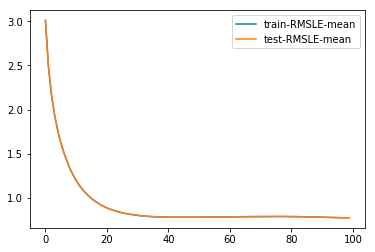

In [34]:
results[['train-RMSLE-mean', 'test-RMSLE-mean']].plot()

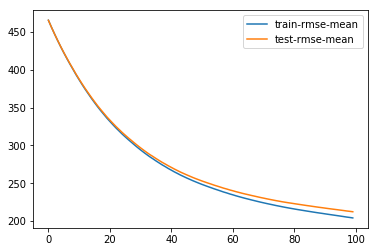

In [32]:
results[['train-rmse-mean', 'test-rmse-mean']].plot()